In [14]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class HVvsGain_Dataset(Dataset):
    def __init__(self, features, targets):
        self.x_data = torch.tensor(features, dtype=torch.float32).view(-1, 1)
        self.y_data = torch.tensor(targets, dtype=torch.float32).view(-1, 1)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return len(self.x_data)


class HVmodel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(HVmodel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


filepath = "/home/lim/Desktop/TT_code/TT_calibration_analysis_final/result/WALL1/CB22/ROB15/WADC/HV_cal/WALL1_CB22_ROB15_gain_calibration_result.txt"

data = np.loadtxt(filepath, delimiter="\t")
# print(data)
x_data = data[:, 0]
y_data = data[:, 1]
# print(x_data)
# print(y_data)

data = HVvsGain_Dataset(x_data, y_data)
print(data.x_data)
print(data.y_data)
train_loader = DataLoader(data, batch_size=2, shuffle=True, num_workers=2)
# print(train_loader[0])

input_dim = 1
output_dim = 1

model = HVmodel(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10
loss_list = []
for epoch in range(epochs):
    for x_batch, y_batch in train_loader:
        y_pred = model(x_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    print(f"epoch : {epoch}, loss ; {loss.item()}")

tensor([[795.],
        [800.],
        [805.],
        [810.],
        [815.],
        [820.]])
tensor([[ 7.6125],
        [ 8.0411],
        [ 8.4517],
        [ 9.0970],
        [ 9.4769],
        [10.2309]])
epoch : 0, loss ; 5.643186536430652e+21
epoch : 1, loss ; inf
epoch : 2, loss ; inf
epoch : 3, loss ; nan
epoch : 4, loss ; nan
epoch : 5, loss ; nan
epoch : 6, loss ; nan
epoch : 7, loss ; nan
epoch : 8, loss ; nan
epoch : 9, loss ; nan


tensor([[-1.4639],
        [-0.8783],
        [-0.2928],
        [ 0.2928],
        [ 0.8783],
        [ 1.4639]])
tensor([[ 7.6125],
        [ 8.0411],
        [ 8.4517],
        [ 9.0970],
        [ 9.4769],
        [10.2309]])
epoch : 0, loss ; 82.0203628540039
epoch : 10, loss ; 54.76008605957031
epoch : 20, loss ; 36.560909271240234
epoch : 30, loss ; 24.41099739074707
epoch : 40, loss ; 16.299619674682617
epoch : 50, loss ; 10.8843994140625
epoch : 60, loss ; 7.269153594970703
epoch : 70, loss ; 4.85558557510376
epoch : 80, loss ; 3.244267702102661
epoch : 90, loss ; 2.168538808822632
epoch : 100, loss ; 1.4503735303878784
epoch : 110, loss ; 0.9709212183952332
epoch : 120, loss ; 0.6508339643478394
epoch : 130, loss ; 0.43714001774787903
epoch : 140, loss ; 0.29447731375694275
epoch : 150, loss ; 0.1992342323064804
epoch : 160, loss ; 0.1356508731842041
epoch : 170, loss ; 0.09320154786109924
epoch : 180, loss ; 0.06486178934574127
epoch : 190, loss ; 0.045941829681396484
epoch 

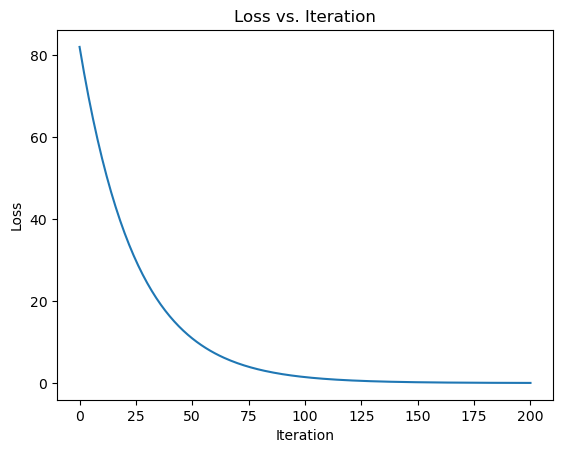

slope: 0.8500275611877441
intercept: 8.66525650024414
tensor([690.3874], grad_fn=<ViewBackward0>)


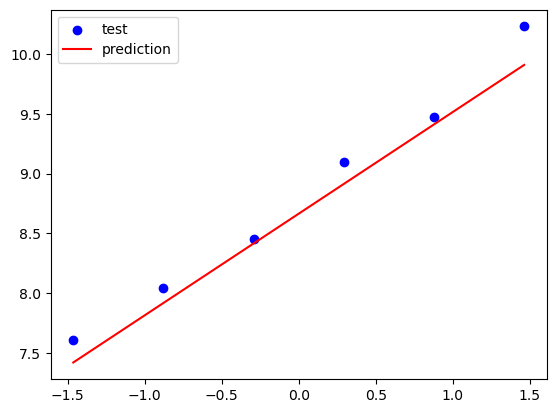

In [48]:
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class HVvsGain_Dataset(Dataset):
    def __init__(self, features, targets):
        self.x_data = torch.tensor(features, dtype=torch.float32).view(-1, 1)
        self.y_data = torch.tensor(targets, dtype=torch.float32).view(-1, 1)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return len(self.x_data)


class HVmodel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(HVmodel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


filepath = "/home/lim/Desktop/TT_code/TT_calibration_analysis_final/result/WALL1/CB22/ROB15/WADC/HV_cal/WALL1_CB22_ROB15_gain_calibration_result.txt"

data = np.loadtxt(filepath, delimiter="\t")
# print(data)
x_data = data[:, 0]
y_data = data[:, 1]
# Standardize the features(important for better convergence)
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data.reshape(-1, 1))
x_data = torch.tensor(x_data, dtype=torch.float32)
y_data = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)


print(x_data)
print(y_data)

input_dim = 1
output_dim = 1

model = HVmodel(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 201
loss_list = []

for epoch in range(epochs):

    y_pred = model(x_data)

    loss = criterion(y_pred, y_data)
    loss_list.append(loss.item())
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    if epoch % 10 == 0:
        print(f"epoch : {epoch}, loss ; {loss.item()}")

import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs. Iteration")
plt.show()

plt.scatter(
    x_data.detach().numpy(), y_data.detach().numpy(), color="blue", label="test"
)
plt.plot(
    x_data.detach().numpy(),
    model(x_data).detach().numpy(),
    color="red",
    label="prediction",
)
plt.legend()

print("slope: {}".format(model.linear.weight.item()))
print("intercept: {}".format(model.linear.bias.item()))

# prediction
x_data = torch.Tensor([802.0])
y_prediction = model(x_data)

print(y_prediction)

Epoch: 0, Loss: 69.96243794759114
Epoch: 10, Loss: 20.68714714050293
Epoch: 20, Loss: 6.107835451761882
Epoch: 30, Loss: 1.8353922764460247
Epoch: 40, Loss: 0.5525465806325277
Epoch: 50, Loss: 0.16641842822233835
Epoch: 60, Loss: 0.05598224885761738
Epoch: 70, Loss: 0.021886229126115115
Epoch: 80, Loss: 0.012294154148548841
Epoch: 90, Loss: 0.00933691052099069
Epoch: 100, Loss: 0.008549047323564688
Epoch: 110, Loss: 0.00820657874767979
Epoch: 120, Loss: 0.008200342844550809
Epoch: 130, Loss: 0.008104851624617973
Epoch: 140, Loss: 0.008149276642749706
Epoch: 150, Loss: 0.008074567187577486
Epoch: 160, Loss: 0.008146244722108046
Epoch: 170, Loss: 0.008084392097468177
Epoch: 180, Loss: 0.00808287039399147
Epoch: 190, Loss: 0.008113019148974368
Epoch: 200, Loss: 0.008098790732522806
Training complete.


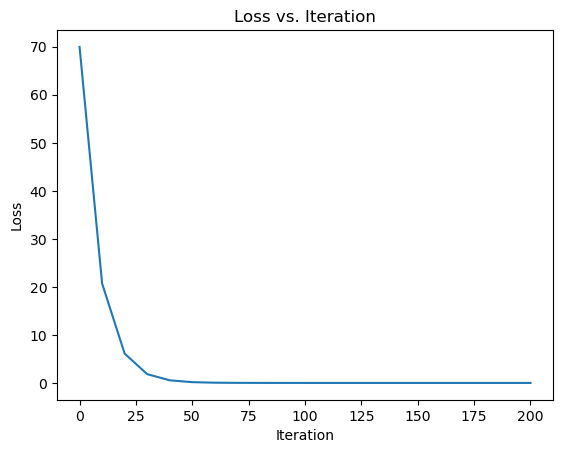

slope: 0.8805967569351196
intercept: 8.818507194519043
tensor([715.0571], grad_fn=<ViewBackward0>)


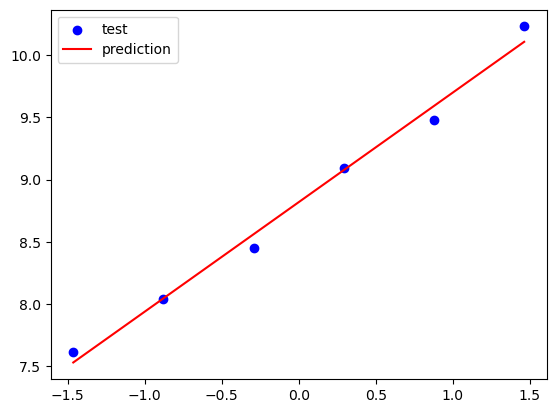

In [52]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler  # Fixed import


# Dataset class
class HVvsGain_Dataset(Dataset):
    def __init__(self, features, targets):
        self.x_data = torch.tensor(features, dtype=torch.float32).view(-1, 1)
        self.y_data = torch.tensor(targets, dtype=torch.float32).view(-1, 1)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return len(self.x_data)


# Linear model class
class HVmodel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(HVmodel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


# Load and preprocess data
filepath = "/home/lim/Desktop/TT_code/TT_calibration_analysis_final/result/WALL1/CB22/ROB15/WADC/HV_cal/WALL1_CB22_ROB15_gain_calibration_result.txt"
data = np.loadtxt(filepath, delimiter="\t")

x_data = data[:, 0]
y_data = data[:, 1]

# Standardize the features (important for better convergence)
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data.reshape(-1, 1))

# Convert to tensors
# x_data = torch.tensor(x_data, dtype=torch.float32)
# y_data = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)

data = HVvsGain_Dataset(x_data, y_data)
train_loader = DataLoader(data, batch_size=2, shuffle=True)
# Initialize model, criterion, and optimizer
input_dim = 1
output_dim = 1
model = HVmodel(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 201
loss_list = []
for epoch in range(epochs):
    loss_sum = 0
    for x_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(x_batch)

        # Compute loss
        loss = criterion(y_pred, y_batch)
        loss_sum += loss.item()
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_sum/len(train_loader)}")
        loss_list.append(loss_sum / len(train_loader))

print("Training complete.")


import matplotlib.pyplot as plt

plt.plot(range(0, epochs, 10), loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs. Iteration")
plt.show()

plt.scatter(
    data.x_data.detach().numpy(),
    data.y_data.detach().numpy(),
    color="blue",
    label="test",
)
plt.plot(
    data.x_data.detach().numpy(),
    model(data.x_data).detach().numpy(),
    color="red",
    label="prediction",
)
plt.legend()

print("slope: {}".format(model.linear.weight.item()))
print("intercept: {}".format(model.linear.bias.item()))

# prediction
x_data = torch.Tensor([802.0])
y_prediction = model(x_data)

print(y_prediction)